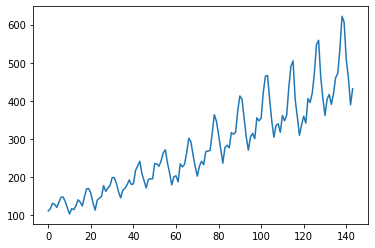

In [2]:
# Пакеты, используемые в работе
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Пропускаем первый столбец данных, содержащий дату
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataframe)
plt.show()

In [3]:
# Преобразование целочисленных значений в значения с плавающей запятой, более подходящие для нейросети
dataset = dataframe.values
dataset = dataset.astype('float32')
# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
# Разделим упорядоченный набор данных в соотношении 2:1
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [5]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение.

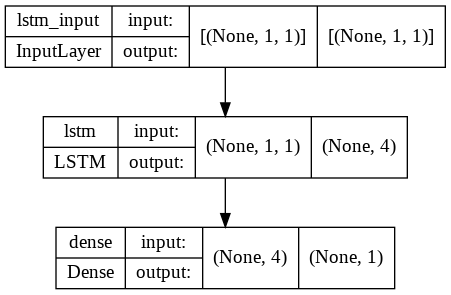

In [7]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 5s - loss: 0.0588 - mae: 0.1880 - 5s/epoch - 51ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0300 - mae: 0.1304 - 372ms/epoch - 4ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0208 - mae: 0.1139 - 388ms/epoch - 4ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0184 - mae: 0.1109 - 364ms/epoch - 4ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0171 - mae: 0.1076 - 328ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0158 - mae: 0.1037 - 322ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0147 - mae: 0.1003 - 295ms/epoch - 3ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0136 - mae: 0.0961 - 224ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0125 - mae: 0.0920 - 231ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0115 - mae: 0.0886 - 249ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0105 - mae: 0.0839 - 199ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0095 - mae: 0.0800 - 216ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0086 - mae: 0.0756 - 251ms/epoch - 3ms/st

In [9]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

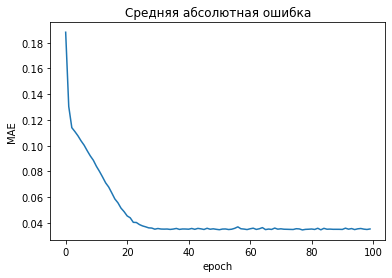

In [11]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [12]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.96 RMSE
Test Score: 49.47 RMSE


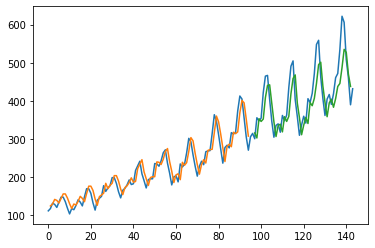

In [13]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 # Сеть с двумя слоями: LSTM слой с 8 нейронами и выходной слой, выдающий 1 значение.

In [14]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

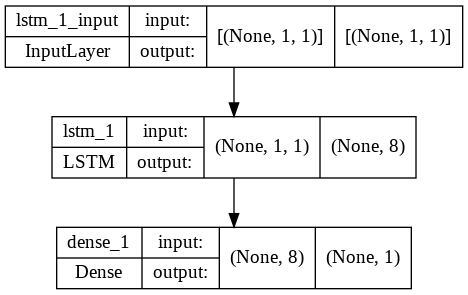

In [15]:
model_8_neuron = Sequential()
model_8_neuron.add(LSTM(8, input_shape=(1, look_back)))
model_8_neuron.add(Dense(1))

plot_model(model_8_neuron, show_shapes=True, show_layer_names=True)

In [16]:
model_8_neuron.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model_8_neuron.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0451 - mae: 0.1658 - 2s/epoch - 26ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0205 - mae: 0.1099 - 170ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0161 - mae: 0.1038 - 162ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0148 - mae: 0.1004 - 157ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0135 - mae: 0.0957 - 157ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0122 - mae: 0.0912 - 156ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0110 - mae: 0.0861 - 156ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0094 - mae: 0.0800 - 159ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0079 - mae: 0.0731 - 147ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0065 - mae: 0.0643 - 172ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0050 - mae: 0.0565 - 207ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0039 - mae: 0.0504 - 159ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0030 - mae: 0.0436 - 163ms/epoch - 2ms/st

In [17]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

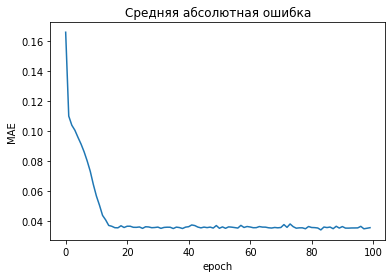

In [18]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [19]:
# Предсказание значений
trainPredict = model_8_neuron.predict(trainX)
testPredict = model_8_neuron.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.73 RMSE
Test Score: 48.38 RMSE


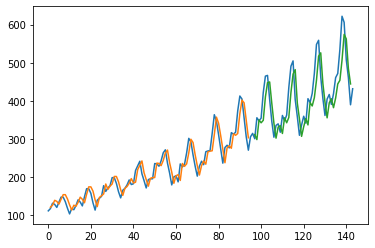

In [20]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Оптимизатор = rmsprop

In [21]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

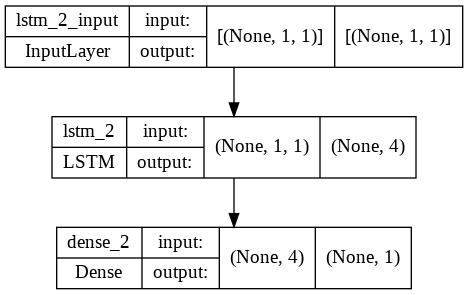

In [22]:
model_rmsprop = Sequential()
model_rmsprop.add(LSTM(4, input_shape=(1, look_back)))
model_rmsprop.add(Dense(1))

plot_model(model_rmsprop, show_shapes=True, show_layer_names=True)

In [23]:
model_rmsprop.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
ts_training = model_rmsprop.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0254 - mae: 0.1214 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0121 - mae: 0.0881 - 149ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0102 - mae: 0.0822 - 162ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0092 - mae: 0.0779 - 164ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0082 - mae: 0.0751 - 169ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0074 - mae: 0.0699 - 145ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0065 - mae: 0.0655 - 138ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0056 - mae: 0.0602 - 152ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0048 - mae: 0.0560 - 138ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0042 - mae: 0.0509 - 159ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0036 - mae: 0.0482 - 156ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0032 - mae: 0.0450 - 152ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0029 - mae: 0.0421 - 147ms/epoch - 2ms/st

In [24]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

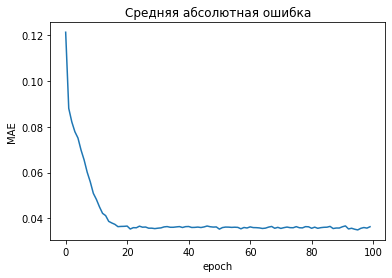

In [25]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [26]:
# Предсказание значений
trainPredict = model_rmsprop.predict(trainX)
testPredict = model_rmsprop.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.30 RMSE
Test Score: 47.59 RMSE


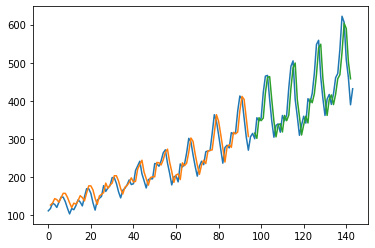

In [27]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Функция активации = exponential

In [28]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

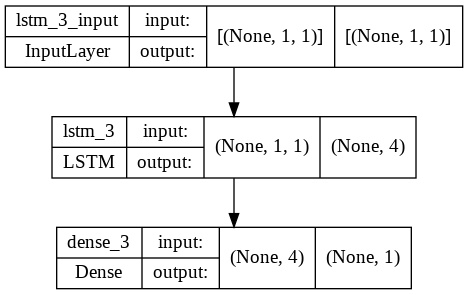

In [29]:
model_exponential = Sequential()
model_exponential.add(LSTM(4, input_shape=(1, look_back), recurrent_activation= "exponential"))
model_exponential.add(Dense(1))

plot_model(model_exponential, show_shapes=True, show_layer_names=True)

In [30]:
model_exponential.compile(loss='mean_squared_error', metrics=['mae'])
ts_training = model_exponential.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0605 - mae: 0.1891 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0282 - mae: 0.1318 - 128ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0223 - mae: 0.1226 - 121ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0188 - mae: 0.1124 - 152ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0162 - mae: 0.1056 - 152ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0142 - mae: 0.0977 - 130ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0122 - mae: 0.0913 - 129ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0103 - mae: 0.0836 - 134ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0083 - mae: 0.0747 - 125ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0062 - mae: 0.0641 - 123ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0042 - mae: 0.0523 - 121ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0030 - mae: 0.0439 - 131ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0023 - mae: 0.0394 - 134ms/epoch - 1ms/st

In [31]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

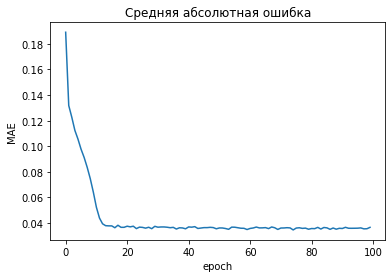

In [32]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [33]:
# Предсказание значений
trainPredict = model_exponential.predict(trainX)
testPredict = model_exponential.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.76 RMSE
Test Score: 50.73 RMSE


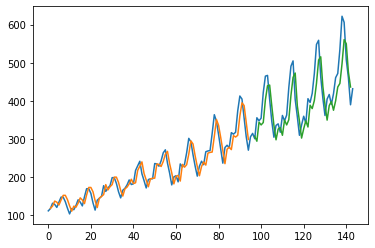

In [34]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. look_back = 4

In [35]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

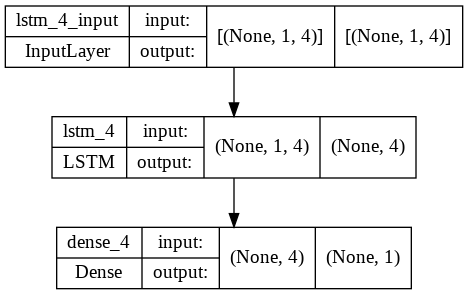

In [36]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [37]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
91/91 - 2s - loss: 0.0251 - mae: 0.1202 - 2s/epoch - 23ms/step
Epoch 2/100
91/91 - 0s - loss: 0.0086 - mae: 0.0723 - 153ms/epoch - 2ms/step
Epoch 3/100
91/91 - 0s - loss: 0.0072 - mae: 0.0690 - 143ms/epoch - 2ms/step
Epoch 4/100
91/91 - 0s - loss: 0.0064 - mae: 0.0647 - 144ms/epoch - 2ms/step
Epoch 5/100
91/91 - 0s - loss: 0.0056 - mae: 0.0600 - 141ms/epoch - 2ms/step
Epoch 6/100
91/91 - 0s - loss: 0.0050 - mae: 0.0559 - 142ms/epoch - 2ms/step
Epoch 7/100
91/91 - 0s - loss: 0.0047 - mae: 0.0535 - 169ms/epoch - 2ms/step
Epoch 8/100
91/91 - 0s - loss: 0.0046 - mae: 0.0532 - 134ms/epoch - 1ms/step
Epoch 9/100
91/91 - 0s - loss: 0.0043 - mae: 0.0512 - 143ms/epoch - 2ms/step
Epoch 10/100
91/91 - 0s - loss: 0.0042 - mae: 0.0508 - 135ms/epoch - 1ms/step
Epoch 11/100
91/91 - 0s - loss: 0.0041 - mae: 0.0492 - 148ms/epoch - 2ms/step
Epoch 12/100
91/91 - 0s - loss: 0.0040 - mae: 0.0487 - 137ms/epoch - 2ms/step
Epoch 13/100
91/91 - 0s - loss: 0.0040 - mae: 0.0486 - 140ms/epoch - 2ms/st

In [38]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

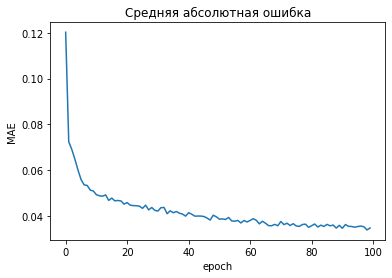

In [39]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [40]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.18 RMSE
Test Score: 65.55 RMSE


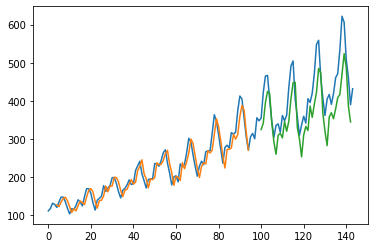

In [41]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()